### Heart disease prediction project is studied by varios Machine Learning approach. 

In [1]:
# Importing the libraries
import pandas as pd

#### Import the Dataset of heart diesese

In [5]:
# Importing the Dataset
data = pd.read_csv("heart.csv")

In [6]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### Care of Missing values

In [9]:
data.isnull().head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Taking care of Duplicate Values 

In [11]:
data_dup = data.duplicated().any()
data_dup

True

In [12]:
# drop the duplicate data 
data = data.drop_duplicates()

# Chheck the duplicate values
data_dup = data.duplicated().any()
data_dup

False

#### Prepocessing: Data Processing

In [14]:
cate_val =[]
cont_val =[]

for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)    


In [15]:
# Categorical columns
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [16]:
# numerical columns
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Encoding Categorical Data:

In [17]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [19]:
data["cp"]

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     1
13     0
14     0
16     2
17     0
18     1
19     2
20     2
21     0
22     0
23     2
24     2
25     0
26     2
27     1
28     2
29     0
30     0
      ..
530    0
533    0
536    2
541    2
549    2
555    0
566    0
570    2
580    1
582    1
594    0
599    1
606    0
611    0
616    0
628    3
629    3
633    0
643    0
652    3
691    1
694    0
708    2
719    0
720    2
723    2
733    2
739    0
843    3
878    0
Name: cp, Length: 302, dtype: int64

In [21]:
# the unique values of cp column
data["cp"].unique()

array([0, 1, 2, 3])

In [22]:
# Remove sex column and terget column because it already have 0 and 1. Encoding is not required here
cate_val.remove('sex')
cate_val.remove('target')

# dummies all categorical vaues
data = pd.get_dummies(data, columns= cate_val, drop_first= True)
data.head(5)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### Feature scaling
##### 

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

data.head(5)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


#### Spiliting the dataset inti the Training set and test set

In [26]:
# Dependent variables
X = data.drop('target', axis=1)
X.head(5)

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [31]:
# Independent variables
y = data['target']
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [32]:
# now to perform train and test split
from sklearn.model_selection import train_test_split


In [36]:
X_train, X_test, y_train, y_test= train_test_split (X, y, test_size=0.2, random_state=42)

X_train.head(5)

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [37]:
y_train.head(5)

163    0
291    0
280    1
85     1
239    0
Name: target, dtype: int64

In [38]:
X_test.head(5)

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,0,0,0,1,...,1,1,0,0,1,0,0,1,0,0
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [40]:
y_test.head(5)

245    1
349    0
135    0
389    1
66     1
Name: target, dtype: int64

### Logistic Regression

In [41]:
data.head(5)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [43]:
# Traget is based on classificaion problem

# import Logistic Regression 
from sklearn.linear_model import LogisticRegression

In [44]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
# prediction the y value
y_pred_log = log.predict(X_test)
y_pred_log

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [47]:
# accuracy_score import from sklearn
from sklearn.metrics import accuracy_score

In [49]:
# accuracy between y_test and y_predict by Logistic Regression
accuracy_score(y_test, y_pred_log)

0.7868852459016393

### Support vector classifier (SVC)

In [50]:
# import support vector machine
from sklearn import svm

In [51]:
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
#predict
y_pred_svc = svm.predict(X_test)
y_pred_svc

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [53]:
# Accuracy test by SVC
accuracy_score(y_test, y_pred_svc)

0.8032786885245902

### KNeighbors Classifiers

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier(n_neighbors=2)

In [62]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [63]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [64]:
accuracy_score(y_test, y_pred_knn)

0.8032786885245902

In [67]:
score = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred_knn= knn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred_knn))

In [68]:
 score

[0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902]

### Non_Linear Algorithms
#### not required to perform feature and encoding scalling


In [70]:
data = pd.read_csv('heart.csv')
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [71]:
data= data.drop_duplicates()
data.shape

(302, 14)

In [72]:
X = data.drop('target', axis=1)
y= data['target']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#### Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
y_pred_dt= dt.predict(X_test)
y_pred_dt

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0])

In [79]:
# check accuracy test by Dicision tree
accuracy_score(y_test, y_pred_dt)

0.7377049180327869

#### Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [81]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [82]:
## Accuracy test by Randon Forest
accuracy_score(y_test, y_pred_rf)

0.819672131147541

#### Gradient Boosting Classifieer

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

gbc =GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [88]:
# perform prediction by GBC
y_pred_gbc= gbc.predict(X_test)
y_pred_gbc

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [89]:
accuracy_score(y_test, y_pred_gbc)

0.8032786885245902

##### Make a data frame by models score

In [90]:
final_data = pd.DataFrame({'Models': ['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'], 'ACC': [accuracy_score(y_test, y_pred_log),  accuracy_score(y_test, y_pred_svc), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gbc)]})

In [91]:
# Let see the models predictions
final_data

,Models,ACC
0,LR,0.786885
1,SVC,0.803279
2,KNN,0.803279
3,DT,0.737705
4,RF,0.819672
5,GBC,0.803279


In [92]:
# import seaborn
import seaborn as sns


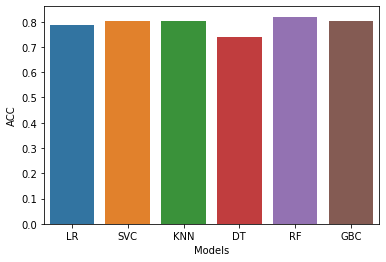

In [94]:
sns.barplot(final_data['Models'], final_data['ACC'])

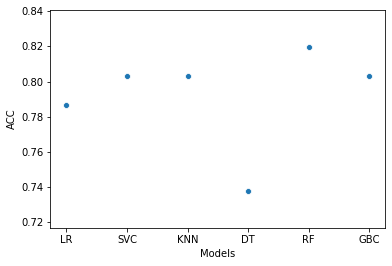

In [97]:
sns.scatterplot(final_data['Models'], final_data['ACC'])

### Random forest Classifier is good model in this case. It can predict high accuracy score.

#### Lets check for hart disese or not by Random Classifier

In [98]:
X = data.drop('target', axis=1)
y= data['target']

In [99]:
X.shape

(302, 13)

In [100]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Prediction on New data

In [101]:
import pandas as pd

In [103]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol': 212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
    }, index=[0])

In [104]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [105]:
# Now check:
p = rf.predict(new_data)
if p[0] == 0:
    print("NO Diesesa")
else:
    print("Disease")    

NO Diesesa
